In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

## 1. Load and split samples.

C:\Users\huafe\AppData\Local\Temp/ipykernel_18896/927268885.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  size = np.int(np.sqrt(len(pos_samples)))


Text(0.5, 1.0, 'Show positive samples')

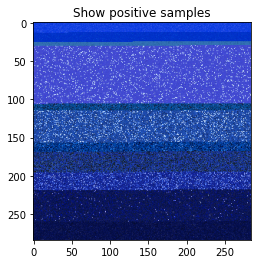

In [2]:
# Load and show positive samples.
pos_train_dir = "data/train_samples/positive"
pos_train_paths = [os.path.join(pos_train_dir, file) for file in os.listdir(pos_train_dir)]

pos_samples = []
for path in pos_train_paths:
    sample = np.load(path)
    pos_samples.append(sample)

pos_samples = np.concatenate(pos_samples)

size = np.int(np.sqrt(len(pos_samples)))
plt.imshow(pos_samples[:(size*size)].reshape(size, size, 3))
plt.title("Show positive samples")

C:\Users\huafe\AppData\Local\Temp/ipykernel_18896/2140431666.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  size = np.int(np.sqrt(len(neg_samples)))


Text(0.5, 1.0, 'Show negative samples')

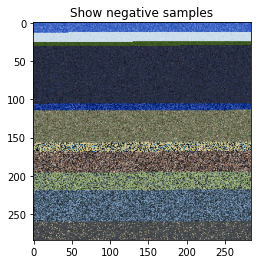

In [3]:
# Load and show negative samples.
neg_train_dir = "data/train_samples/negative"
neg_train_paths = [os.path.join(neg_train_dir, file) for file in os.listdir(neg_train_dir)]

neg_samples = []
for path in neg_train_paths:
    sample = np.load(path)
    neg_samples.append(sample)

neg_samples = np.concatenate(neg_samples)

size = np.int(np.sqrt(len(neg_samples)))
plt.imshow(neg_samples[:(size*size)].reshape(size, size, 3))
plt.title("Show negative samples")

In [4]:
# Split to train and val parts.
np.random.shuffle(pos_samples)
np.random.shuffle(neg_samples)

train_ratio = int(len(pos_samples) * 0.7)
train_pos_samples = pos_samples[:train_ratio]
train_neg_samples = neg_samples[:train_ratio]
val_pos_samples = pos_samples[train_ratio:]
val_neg_samples = neg_samples[train_ratio:]

train_pos_labels = [1, ] * len(train_pos_samples)
train_neg_labels = [0, ] * len(train_neg_samples)
val_pos_labels = [1, ] * len(val_pos_samples)
val_neg_labels = [0, ] * len(val_neg_samples)

In [5]:
# Print train and val info.
print("Train sample shape: ", train_pos_samples.shape)
print("Val sample shape: ", val_pos_samples.shape)

Train sample shape:  (56542, 3)
Val sample shape:  (24233, 3)


In [6]:
# Setup for the final train/val datasets.
train_samples =  np.concatenate([train_pos_samples, train_neg_samples])
train_labels = np.concatenate([train_pos_labels, train_neg_labels])
val_samples =  np.concatenate([val_pos_samples, val_neg_samples])
val_labels = np.concatenate([val_pos_labels, val_neg_labels])

p = np.random.permutation(len(train_samples))
train_samples = train_samples[p]
train_labels = train_labels[p]
p = np.random.permutation(len(val_samples))
val_samples = val_samples[p]
val_labels = val_labels[p]

## 2. Train and validate LogisticRegression model.

In [7]:
def sigmoid(x):
    x = x.astype(np.float64)
    results = 1 / (1 + np.exp(-x))
    return results

def gradient_process(x, y, w, learning_rate, times):
    cost_process = np.zeros((iterations,1))
    n = len(y)
    for i in range(times):
        sigmoid_out=sigmoid(x @ w)
        w = w - (learning_rate/n) * (x.T @ (sigmoid_out - y)) 
        cost_process[i] = cost(x, y, w)
    return cost_process, w

def cost(x, y, theta):
    h = sigmoid(x @ theta)
    j = len(y)
    e = 1e-5
    cost = (1/j)*(-((1-y).T @ np.log(1-h + e))+((-y).T @ np.log(h + e)))
    return cost

def predict_value(X, params):
    return sigmoid(X @ params)

def predict(x, params):
    return np.round(sigmoid(x @ params))

def score(x, y, params):
    y_pred = predict(x, params)
    score = float(sum(y_pred == y))/ float(len(y))
    return score

In [8]:
# Append the ones column.
train_labels = train_labels[:,np.newaxis]
train_samples = np.hstack((np.ones((len(train_labels),1)),train_samples))

val_labels = val_labels[:,np.newaxis]
val_samples = np.hstack((np.ones((len(val_labels),1)),val_samples))

In [9]:
# Initial parameters for logistic regression model.
params = np.random.normal(0.0, 0.1, (train_samples.shape[1], 1))

In [10]:
# Train the logistic regression model.
iterations = 100
learning_rate = 0.001

(cost_history, params_optimal) = gradient_process(train_samples, train_labels, params, learning_rate, iterations)

In [11]:
# Show train and validation results.
train_score = score(train_samples, train_labels, params_optimal)
val_score = score(val_samples, val_labels, params_optimal)

print("Train score: ", train_score)
print("Val score: ", val_score)

Train score:  0.9280092674472074
Val score:  0.9257004910659019


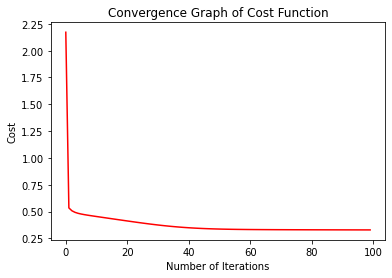

In [12]:
# Plot training lost.
plt.figure()
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [13]:
# Save parameters.
model_path = "model2.ckpt.npy"
np.save(model_path, params_optimal)

## 3. Segment images and get bounding boxes.

C:\Users\huafe\AppData\Local\Temp/ipykernel_18896/289653178.py:36: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  flatten_preds = np.array(flatten_preds > lr_conf_threshold, np.float)


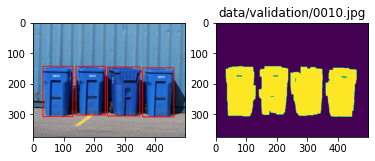

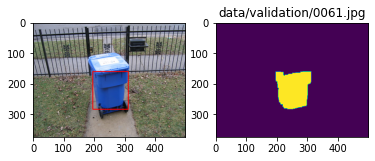

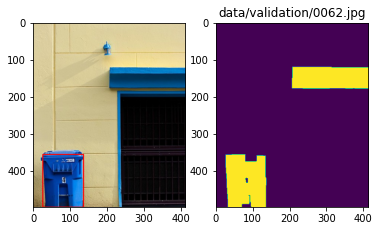

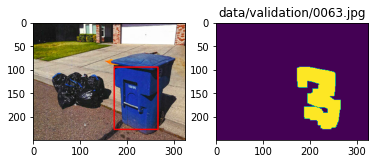

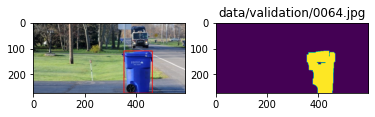

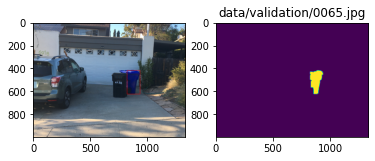

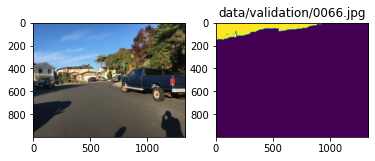

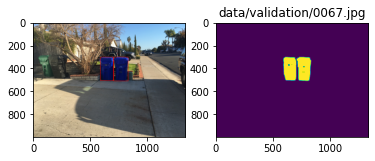

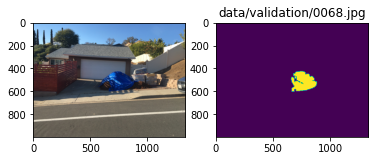

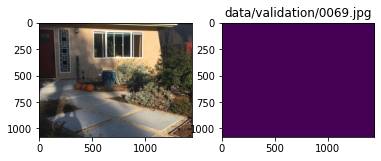

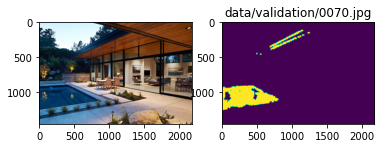

In [14]:
import cv2
import yaml

# Hyper-parameters.
lr_conf_threshold = 0.85
val_dir = "data/validation/"
model_path = "model.ckpt.npy"

# Load logistic regression model.
params_optimal = np.load(model_path)

# Load jpeg/jpg images.
img_paths = [
    os.path.join(val_dir, file) 
    for file in os.listdir(val_dir) 
    if file[-4:]==".jpg" or file[-5:]==".jpeg"
]
seg_masks = []
pred_boxes = []
gt_boxes = []

for img_path in img_paths:
    # read one test image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Load groundtruth.
    if img_path[-4:]==".jpg":
        gt_path = img_path[:-4] + ".txt"
    elif img_path[-5:]==".jpeg":
        gt_path = img_path[:-5] + ".txt"
    w, h, c = img.shape
    flatten_img = img.reshape((w*h, c))
    flatten_img = np.hstack((np.ones((len(flatten_img),1)),flatten_img))
    
    flatten_preds = predict_value(flatten_img, params_optimal)
    flatten_preds = np.array(flatten_preds > lr_conf_threshold, np.float)
    preds = flatten_preds.reshape((w, h)).astype("uint8")
    
    # Apply compution vision erode and dilation to filter out spike blobs.
    filter_mask = np.ones((5, 5), dtype="uint8")
    erode_preds = cv2.erode(preds, filter_mask, iterations=3)
    preds = cv2.dilate(erode_preds, filter_mask, iterations=4)
    
    hKernel = cv2.getStructuringElement(cv2.MORPH_RECT,(1,7))
    erodes= cv2.erode(preds, hKernel , iterations=3)
    preds = cv2.dilate(erodes,  hKernel , iterations=3)

    seg_masks.append(preds)
    
    # Get contours and bounding box from segmentation masks.
    contours, hierarchy = cv2.findContours(preds, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) 
    boxes = []
    for i, contour in enumerate(contours):
        x, y, bw, bh = cv2.boundingRect(contour.astype("float32"))  # X, Y, W, H
        area = cv2.contourArea(contour)
        # Some heuristic rules.
        if area / (w*h) < 0.01:
            continue
        if bh/bw < 1.0:
            continue
        boxes.append([x, y, x+bw, y+bh])
    pred_boxes.append(boxes)
        
    # Draw necessary visualization.
    for box in boxes:
        img = cv2.rectangle(img, (box[0], box[1]), (box[2], box[3]), (255, 0, 0), 2)
    plt.imshow(img)
    
    plt.subplot(121)
    plt.imshow(img)
    plt.subplot(122)
    plt.imshow(preds)
    plt.title(img_path)
    plt.show()

In [15]:
# The final parameter use
params_optimal

array([[ 0.02903287],
       [-0.0415715 ],
       [-0.06720769],
       [ 0.06795101]])